# Characterization workflow using Clerke’s carbonate Arab D Rosetta Stone calibration data to provide for a full pore system characterization with modeled saturations for an Arab D complex carbonate reservoir.

Geolog has always been found to be a user-friendly Petrophysical software tool that allows us to load, interrogate, process and display well log and production data. With the introduction of Geolog18, we can also use python code in our Geolog loglans to push the analysis even further.  Geolog python loglans can exploit state-of-the-art techniques in python to interrogate and build probabilistic methods to estimate additional well log curves, core analysis results, rock types, facies, engineering parameters and petrophysical properties.  

Soon we will have a repository that includes a comprehensive Geolog project with Geolog python loglans, data and one well to utilize a proven workflow to interrogate and characterize a typical Arab D carbonate reservoir in the project well. This example serves as the basis for a full-field reservoir characterization workflow for all wells throughout the entire field. In this example we are showing the results for just one well, but in the full-field reservoir characterization we would follow the same workflow and generate the same results for all wells. The final objective would be to use these well data results and create a 3D static model of porosity, permeability, Petrophysical Rock Types (PRT), capillary pressure parameters and saturations. Typically this static model would be used to initialize the dynamic model in reservoir simulation. 

![Geolog_Image](Results.png)


This repository uses Jupyter Notebooks to demonstrate a tried and proven workflow with the techniques as described by Phillips(1) et al. used in the characterization of most Arab D reservoirs in Saudi Arabia. Permeability, Petrophysical Rock Types (PRT), Capillary Pressure and modeled saturations are all estimated or calculated in this workflow in order to characterize this complex carbonate reservoirs, and Clerke’s(2) Arab D Rosetta Stone core analysis database is used as the calibration data. 

These calibration data are from Ed Clerke’s Rosetta Stone, Arab-D carbonate dataset from Ghawar field in Saudi Arabia. This is a very special carbonate dataset. Clerke randomly selected the final calibration samples from 1,000’s of core plugs for the final dataset.  The Rosetta Stone data cover the full range in poro-perm space and Petrophysical Rock Types (PRTs) observed in the Arab D reservoir. For each sample Clerke acquired High Pressure Mercury Injection (HPMI)  and fit the capillary pressure curves using a Thomeer hyperbola (see Altair Plot of Capillary Pressure curves) created from the Initial Displacement Pressure (Pdi), Pc curvature term Gi that relates to the variability of pore throats and Bulk Volume Occupied (BVocci) that is related to the Pore Volume for each pore system i.  From the results Clerke defined his Petrophysical Rock Types (PRT). For this Arab D reservoir, most PRTs have a dual-porosity system, and some PRTs have up to 3 pore systems. 

## Suggested Arab D Carbonate Workflow:
The following workflow and processing is suggested to interrogate, process, interpret and model the petrophysical properties of a typical Arab D carbonate reservoir using Clerke’s Arab D Rosetta Stone Carbonate database as calibration. The workflow consists of the following steps:

1) Interrogate the Well Log data and Rosetta Stone calibration data using standard Geolog layouts, cross plots and histograms and then use a python loglan featuring Altair, which is interactive software driven from a Geolog Module Launcher.

### Altair Used to Interrogate the Well log data in Geolog:
![Geolog_Image](Geolog20_ArabD.gif)

### Altair used to Interrogate the Rosetta Stone Thomeer Capillary Pressure curves and Petrophysical Rock Types (PRTs):
![Geolog_Image](geolog_altair_thomeer.gif)


2) Run MultiMin for a solid log analysis model using the typical minerals found in the Arab D reservoir; Limestone, Dolomite, Anhydrite and Illite. With MultiMin we always use environmentally corrected log data and use the calculated uncertainties for each log curve employed in the analysis. 

3) Use available core data from the representative reservoir/field to build a petrophysical model to estimate permeability for all wells in field using our python loglan of kNN using normalized input data and weighted by Euclidean distances for each of the nearest neighbors. 

4) Using the kNN estimated permeability and calculated Total Porosity (PHIT) from MultiMin, we query Clerke’s Rosetta Stone core database to predict the following Petrophysical results:
    - Petrophysical Rock Types (PRT) as defined by Clerke (M_1 Macro/Meso, M_2 Macro/Micro, M_1_2 Macro/Meso/Micro, Type1 Meso, Type 1_1 Meso/Micro and Type 2 Micro PRTs.
    - Thomeer Capillary Pressure parameters (Pdi, Gi and BVocci) for each pore system i over the reservoir interval

![Geolog_Image](Thomeer_output.png)

5) Use the Thomeer Capillary Pressure parameters to model saturations based on the buoyancy due to fluid density differences at the height above the Free Water Level (FWL). In this instance we compare the Bulk Volume Oil (BVO) from MultiMin vs. BVO from Thomeer-based capillary pressure saturations since BVO is pore volume weighted.

6) As a secondary technique to estimate PRTs, we also tested another applications in Geolog employing python’s Sklearn as published by Hall(3). We could have estimated Depositions of Environment or other types of categoric geologic facies used in this Sklearn prediction process. There is also a GitHub repository containing the Jypyter Notebook at the following link to use as a help file to understand the process and set model parameters: 

https://github.com/Philliec459/SKLEARN-used-to-predict-Petrophysical-Rock-Types-in-Arab-D-Carbonate

The same data used in Geolog can be evaluated within this Jupyter Notebook using Seaborn matrix plots, various types of a Confusion Matrix plots and the pick the SVM model C and gamma parameters from the Heat Map shown below. However, be sure to input the C_REG and GAMMA values in the Geolog python loglan using the most accurate C and gamma combination presented from the Heat Map.

![Geolog_Image](evaluate.png)

## RESOURCES:
https://www.pdgm.com/products/geolog/

https://github.com/Philliec459?tab=repositories

https://github.com/Philliec459/SKLEARN-used-to-predict-Petrophysical-Rock-Types-in-Arab-D-Carbonate



1.	Phillips, E. C., Buiting, J. M., Clerke, E. A, “Full Pore System Petrophysical Characterization Technology for Complex Carbonate Reservoirs – Results from Saudi Arabia”, AAPG, 2009 Extended Abstract.
2.	Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October, 2008. 
3.	Hall, Brendon, “Facies classification using Machine Learning”, The Leading Edge, 2016, Volume 35, Issue 10
 


# Interrogation of Well Log Data Using Python’s Altair for Dynamically Linked Data

Geolog is quite capable of displaying well log data in the form of cross plots, frequency histograms and layouts that are all dynamically linked data, but python’s Altair package allows the user to plot all data in a user-defined layout that displays depth plots, cross plots and histograms all on one page where all data is dynamically linked on all plots. Select data from one plot and the unselected data is grayed out and only the selected data shows up in color. The following is an Altair plot of the well log data:

In [1]:
#!/usr/bin/env python3
# python loglan

# Imports

from pandas import DataFrame, read_csv

import altair as alt
#alt.renderers.enable('altair_viewer')
alt.data_transformers.disable_max_rows()


import pandas as pd
import numpy as np
import altair_transform
import lasio



'''
  select the proper Neutron-Density Chartbook file
'''

#file = r'./data/cnl_chart_1pt0.xlsx'
file = r'./data/cnl_chart_1pt1.xlsx'
#file = r'./data/tnph_chart_1pt0.xlsx'
#file = r'./data/tnph_chart_1pt19.xlsx'
df_chart = pd.read_excel(file,index_col=False)
#df_chart.head()


'''
  PEF vs. RHOB overlay
'''

#Load PEF vs. RHOB overlay chart
file = r'./data/PEF_Rhob_chart.xlsx'
df_pef = pd.read_excel(file,index_col=False)
df_pef.head()


'''    
  Select the proper Pickett data
  Adjust the Rw and m in the file designated below.
'''

file = r'./data/Pickett_Ro_chart.xlsx'
df_pickett = pd.read_excel(file,index_col=False)
#df_pickett.head()


'''    
  Select log curves for DataFrame called df
'''
#df = pd.DataFrame({'DEPTH':depth, 'RHOB':rhob, 'NPHI':nphi, 'ILD':ild, 'GR':gr, 'PHIT':phit,'PEF':pef, 'DT':dt })

#read the file
file = r'./data/main_well.xlsx'
df = pd.read_excel(file,index_col=False)
 
 
interval = alt.selection_interval()

bottom = 1302.5
top = 1000
#------------------------------------------------
#
#       Depth of Depth Track
#
#------------------------------------------------

base=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top))
    ),
).properties(
    width=200,
    height=600,
    #title='GR',
    selection=interval
)

#no depth labels for base2      
base2=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top)), axis=alt.Axis(labels=False),title='',
    ),
).properties(
    width=200,
    height=600,
    title='',
    selection=interval
)

#------------------------------------------------
#
#       Log Curves of Depth Track
#
#------------------------------------------------
gr = base.mark_circle(clip=True, size=30).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(domain=(0, 75),scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)
   
rhob = base2.mark_circle(clip=True , size=10).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(2, 3))
    ),     
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)
 
nphi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.45, -0.15))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)

dt = base2.mark_circle(clip=True, size=10).encode(
    alt.X('DT:Q',
        scale=alt.Scale(domain=(112, 28))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='DT:Q', 
).properties(
    title='DT',
    selection=interval
)

rt = base2.mark_circle(clip=True, size=10).encode(
    alt.X('ILD:Q', 
          scale=alt.Scale(type='log', domain=(0.2, 2000.0))
    ),
    #x='LRT:Q',  
    #y=('DEPTH'),
    #color=alt.value('black'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='ILD',
    selection=interval
)

phit = base2.mark_circle(clip=True, size=10).encode(
    alt.X('PHIT:Q',
        scale=alt.Scale(domain=(.45, -0.15))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIT:Q', 
).properties(
    title='PHIT',
    selection=interval
)
  

#------------------------------------------------
#
#       Neutron-Density Cross Plot
#
#------------------------------------------------
nd_chart = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)

nd_chart2 = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

ndxplot = base.mark_circle(clip=True,size=20).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='Neut-Den Xplot (GR on Color Axis)',
    width=350,
    height=350,
    selection=interval
)


 
#------------------------------------------------
#
#       PEF-Density Cross Plot
#
#------------------------------------------------
pef_chart = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)

pef_chart2 = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)

pefxplot = base.mark_circle(clip=True, size=20).encode(
    alt.X('PEF:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PEF:Q', 
).properties(
    title='PEF-RHOB Xplot (GR on Color Axis)',
    width=350,
    height=350,
    selection=interval
)



#------------------------------------------------
#
#       Pickett Plot
#
#------------------------------------------------
pickett_chart = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_Ro:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('blue'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)

pickett_chart8 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt75:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('cyan'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)
pickett_chart6 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt5:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('yellow'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)
pickett_chart4 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt25:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('orange'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)
pickett_chart2 = alt.Chart(df_pickett).mark_line(clip=True , size=2 ,strokeDash=[5,5] ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt1:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('red'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=350,
    height=350
    #selection=interval
)
pickett = base.mark_circle(clip=True, size=20).encode(
    alt.X('ILD:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('PHIT:Q',
        scale=alt.Scale(type='log',domain=(.01, 1))
    ),    
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='Pickett Plot (GR on Color Axis)',
    width=350,
    height=350,
    selection=interval
)



#------------------------------------------------
#
#       Histograms
#
#------------------------------------------------
grhist = alt.Chart(df).mark_bar(clip=True).encode(
    #alt.X("GR:Q", bin=alt.Bin(maxbins=75)),
    alt.X('GR:Q',
        bin=alt.Bin(maxbins=75),
        scale=alt.Scale(domain=(0,50)),
    ),
    y='count():Q',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=350,
    height=350,
    selection=interval
)

rhobhist = alt.Chart(df).mark_bar(clip=True).encode(
    #alt.X("RHOB:Q", bin=alt.Bin(maxbins=75)),
    alt.X('RHOB:Q',
        #bin=True,
        bin=alt.Bin(maxbins=75),
        scale=alt.Scale(domain=(2.0,3.0)),
    ),       
    y='count():Q',
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=350,
    height=350,
    selection=interval
)

nphihist = alt.Chart(df).mark_bar(clip=True).encode(
    #alt.X("NPHI:Q",  bin=alt.Bin(maxbins=75)),
    alt.X('NPHI:Q',
        #bin=True,
        bin=alt.Bin(maxbins=75),
        scale=alt.Scale(domain=(0.45, -0.05)),
    ),
    y='count():Q',
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=350,
    height=350,
    selection=interval
)




#------------------------------------------------
#
#       Define Plot Regions for Altair
#
#------------------------------------------------

depth = gr | rhob | nphi | dt  |  phit | rt 

xplot = ndxplot+nd_chart+nd_chart2| pefxplot+pef_chart+pef_chart2 |pickett+pickett_chart+pickett_chart8+pickett_chart6+pickett_chart4  
   
hist =  grhist | rhobhist | nphihist

plot = depth & xplot & hist

plot

#plot.show()






alt.VConcatChart(...)

# Interrogation of Rosetta Stone Data Using Python’s Altair for Dynamically Linked Data

The following is an Altair plot of Clerke’s Rosetta Stone data used for calibration of our Thomeer capillary pressure parameters and Petrophysical Rock Types (PRT). We start by selecting a small sampling of samples from the porosity vs. permeability cross plot, and then Altair shows only the Capillary Pressure curves for the selected samples, a whisker plot of the mode of the mode of the pore throat radius as well as the Pore Throat Distribution plots for all samples or just the selected samples. 


In [2]:
#read the file
file = r'./data/Pc_Results.xlsx'
df = pd.read_excel(file,index_col=False)


interval = alt.selection_interval()

base = alt.Chart(df).properties(
    width=300,
    height=375, 
).add_selection(interval)



kphi = alt.Chart(df).mark_point(filled=True, size=100).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    #size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    tooltip='Mode:Q', 
).properties(
    width=500,
    height=500, 

    title='Porosity vs. Permeability Cross Plot (PRT on Color Axis)',
    selection=interval
)

pc = alt.Chart(df).mark_line(clip=True).encode(
    alt.X('BVOCC:Q',
        scale=alt.Scale(domain=(30, 0))
    ),    
    y='lPc:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    tooltip='Mode:Q', 
    strokeDash='Sample:N',
).properties(
    title='Pc Curves with PRT on Color Axis (Upscaled Pc curve is thick Black Curve)',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)

pc2 = alt.Chart(df).mark_line(strokeWidth=6).encode(
    alt.X('BVOCC:Q', aggregate='mean',
          scale=alt.Scale(domain=(30, 0))
         ),
    alt.Y('lPc:Q'),
    color=alt.value('black'),
).properties(
    #title='Upscaled Pc Curve with PRT as Color Axis',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)
    
ptd = base.mark_line( clip=True).encode(
    alt.X('lMicrons:Q',
        scale=alt.Scale(domain=(-2., 2.5))
    ),    
    alt.Y('dBv:Q',
        scale=alt.Scale(domain=(0, 15))
    ),    
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    strokeDash='Sample:N',
).properties(
    title='Pore Throat Distribution (Microns)',
    width=400,
    height=200,
)

ptd2 = base.mark_line( clip=True).encode(
    alt.X('lMicrons:Q',
        scale=alt.Scale(domain=(-2., 2.5))
    ),    
    alt.Y('dBv:Q',
        scale=alt.Scale(domain=(0, 15))
    ),    
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    strokeDash='Sample:N',
).properties(
    title='Pore Throat Distribution (Microns)',
    width=400,
    height=200,
).transform_filter(
    interval
)


hist2 = alt.Chart(df).mark_bar().encode(
    alt.X('ROCK_INDEX:O'),
    #x='rock_index:O',
    #y='lmode:Q',
    alt.Y('Mode:Q', scale=alt.Scale(type='log', base=10, domain=(0.001, 100.0)), axis=alt.Axis(orient='left') ),
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    title='Mode of Pore Throats by Petrophysical Rock Type (PRT)',
    width=400,
    height=500,
    #selection=interval
)


box2 = alt.Chart(df).mark_boxplot(extent='min-max').encode(
    alt.X('ROCK_INDEX:O'),
    alt.Y('Mode:Q', scale=alt.Scale(type='log', base=10, domain=(0.001, 100.0)), axis=alt.Axis(orient='left') ),
    #color=alt.condition(interval, 'rock_index:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    color='ROCK_INDEX:O',      
).properties(
    title='Box Plot of Mode of PTD by PRT ',
    width=400,
    height=500, 

).transform_filter(
    interval
)




#kphihist = kphi | hist2
kphihist = kphi | box2

pchist = pc + pc2 | ptd & ptd2


plot = kphihist & pchist 



plot






alt.VConcatChart(...)

# Compare Clerke PRTs to Winland r35 and Amaefule RQI and FZI

Most macro rock typically has a dual porosity system where the Pore Throat Distribution (PTD) will have two modes as shown below. 

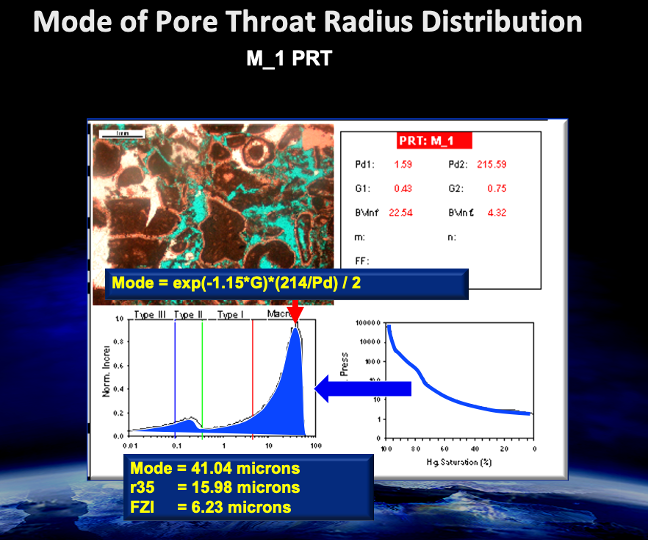

The macro portion of the rock will have a mode greater than 2 microns with a second (or third) mode less than 2 microns. Probably the most abundant PRT is the M_1. This is a macro-porous rock with a mode in the macro portion of the PTD and a second mode in the meso-porosity range. In this PRT both the macro pores and meso-porous grains can have oil saturations once the capillary pressure is great enough to drive out the water. The M_2 PRT is also a macro rock, but the second pore system is micro-porous and is too tight to have hydrocarbon saturations. The Table below shows Clerke's description of his PRT's. 

The following are some example results using Altair where the data in cross plots can be selected and then the appropriate data for those selected samples are shown in the bar charts below the cross plots. 

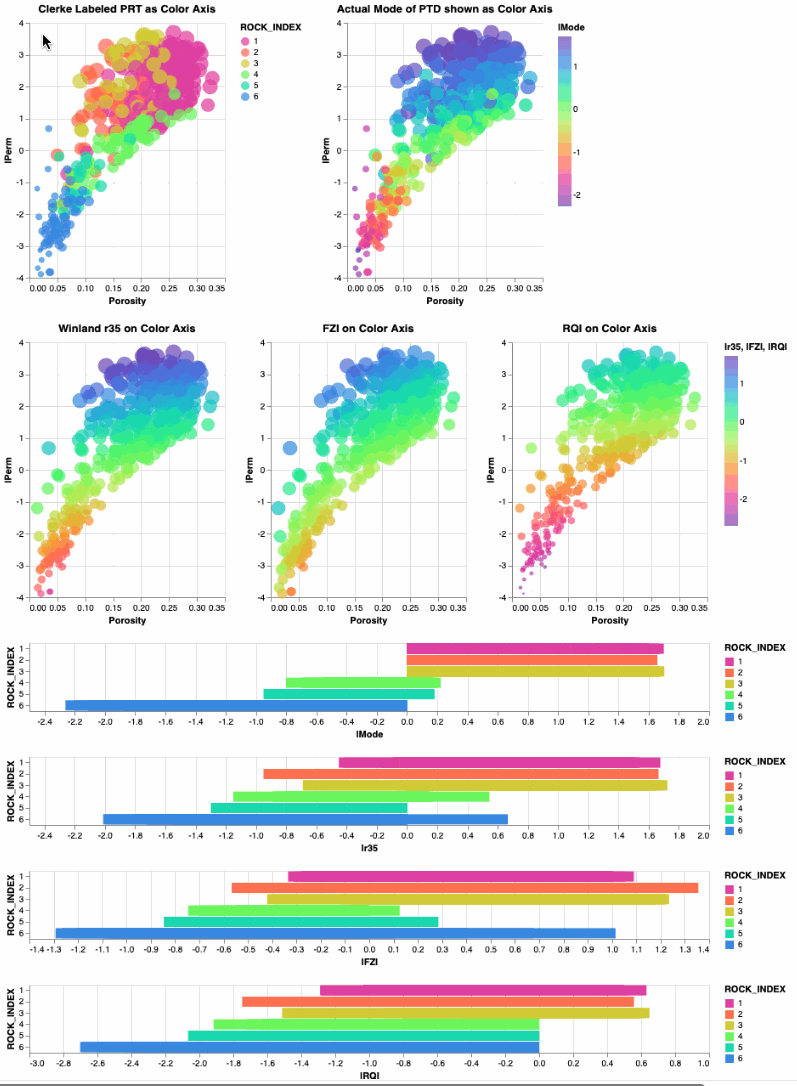

### Petrophysical Rock Typing (PRT):

One of the benefits of working with Thomeer parameters is that the exact mode of the PTD (radius) can be calculated for each sample using the Buiting Mode equation as shown below:

        Mode(microns) = (exp(-1.15 * G) * (214/Pd))/2
        
Again, this equation gives us the mode of the pore system, and we normally only calculate the mode of the largest pore system in the sample. 

In the Altair plots below the first row of poro-perm xplot show the PRT and actual Mode of Pore Throats on the Z color axis. The second row of xplots show the Winland r35 on the color axis, Amaefule FZI and RQI on the color axis.

The actual mode of the Pore Throat Distribution is shown in the first row of the poro-perm xplots. In Rock Typing Winlands' r35 and Amaefule's FZI or RQI attempt to predict the most dominant pore throat. In dual-porosity carbonates Winland's r35 is usually a close proximity, but FZI does not do well. RQI appears to be off, but captures the range of the pore throats a bit better. 

Windland's r35 is calculated:

        r35(microns) = 10**(0.732 + 0.588*log(Permeability) - 0.864*log(Porosity*100))


Amaefule-Kersey FZI is calculated:

        RQI(microns) = 0.0314 * sqrt(Permeability/Porosity)
        
        Phiz = Porosity / (1 - Porosity)

        FZI(microns) = RQI / Phiz
    
where Porosity is a volume fraction and not percent. 

On this dataset it appears that r35 has the best match to the actual mode of the Pore Throat Distribution. The bi-modality in the macro-porous rock has FZI falling between the two modes since it is the mean pore throat radius. Windland's r35 does a fairly good job of estimating the most dominant pore throat. 


### PRT in Relationship with Mode of Pore Throat Distribution, Winland r35 , Amaefule FZI and RQI:

In [3]:
#read the file
file = r'./data/RosettaStone_Arab_D.xlsx'
df = pd.read_excel(file,index_col=False)


interval = alt.selection_interval()

base = alt.Chart(df).properties(
    width=230,
    height=300, 
).add_selection(interval)


prt = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    title='Clerke Labeled PRT as Color Axis',
    selection=interval
)


pointsMode = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'lMode:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    title='Actual Mode of PTD shown as Color Axis',
    selection=interval
)

pointsr35 = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lr35:Q',
    color=alt.condition(interval, 'lr35:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Winland_r35:Q', 
).properties(
    title='Winland r35 on Color Axis',
    selection=interval
)

pointsFZI = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lFZI:Q',
    color=alt.condition(interval, 'lFZI:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='FZI:Q', 
).properties(
    title='FZI on Color Axis',
    selection=interval
)

pointsRQI = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lRQI:Q',
    color=alt.condition(interval, 'lRQI:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RQI:Q', 
).properties(
    title='RQI on Color Axis',
    selection=interval
)

hist1 = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='lMode',
    y='ROCK_INDEX:O',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

hist2 = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='lr35',
    y='ROCK_INDEX:O',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

hist3 = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='lFZI',
    y='ROCK_INDEX:O',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

hist4 = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='lRQI',
    y='ROCK_INDEX:O',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)







thomeer = prt | pointsMode

scatter = pointsr35 | pointsFZI | pointsRQI

thomeer & scatter & hist1 & hist2 & hist3 & hist4



alt.VConcatChart(...)